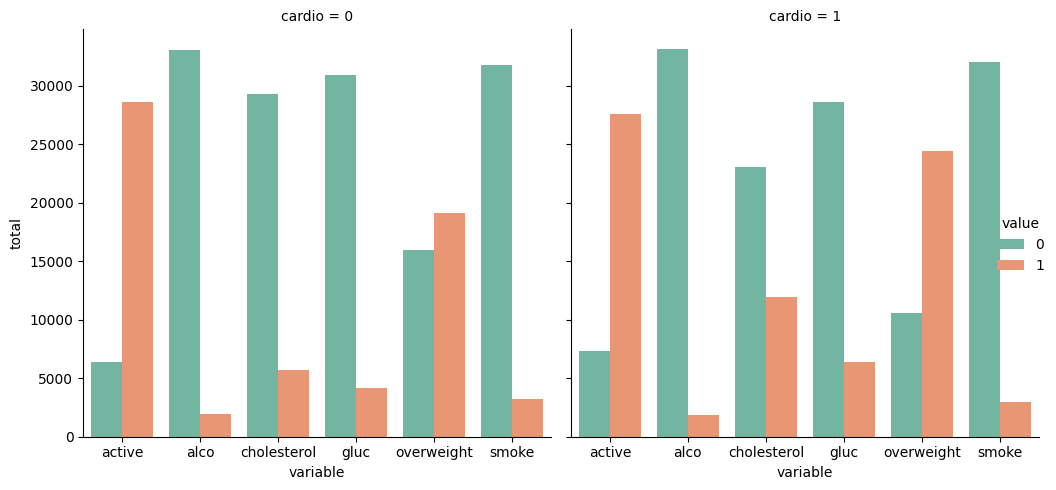

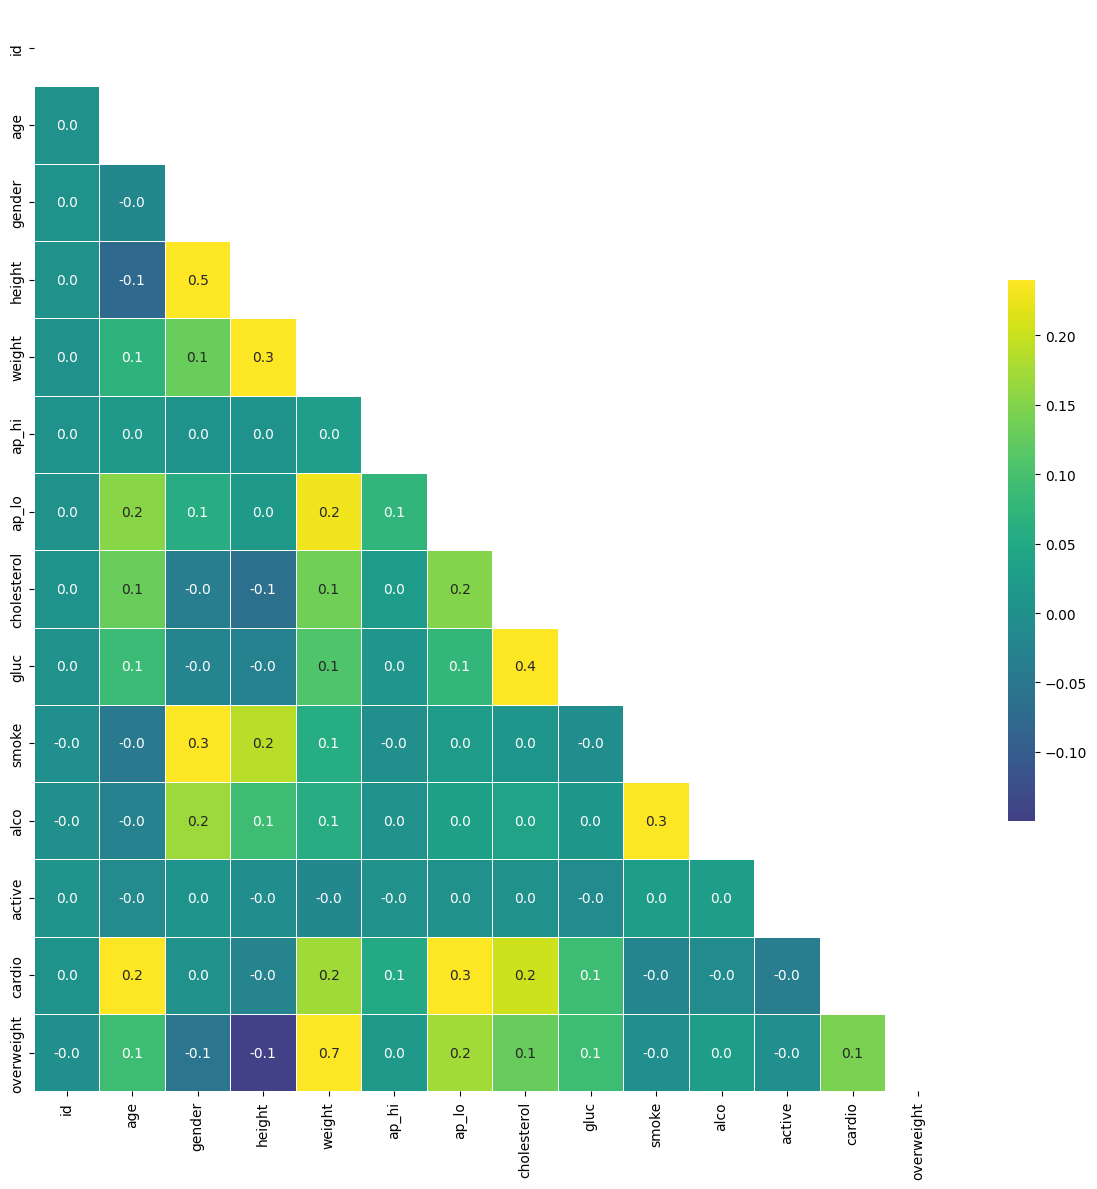

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('medical_examination(1).csv')

# Step 1 (continued): Clean column names by stripping whitespace and converting to lowercase for consistency.
df.columns = df.columns.str.strip().str.lower()

# Step 2: Add an overweight column to the data.

df['height_m'] = df['height'] / 100
df['bmi'] = df['weight'] / (df['height_m'] ** 2)
df['overweight'] = (df['bmi'] > 25).astype(int)
# Drop the temporary columns for BMI calculation
df = df.drop(columns=['height_m', 'bmi'])

# Step 3: Normalize data by making 0 always good and 1 always bad.
# If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

# Step 4: Draw the Categorical Plot in the draw_cat_plot function.
def draw_cat_plot():
    # Step 4 (continued): Create a DataFrame for the cat plot using pd.melt with values
    # from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Step 5: Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature.
    # You will have to rename one of the columns for the catplot to work correctly.
    # The 'reset_index(name='total')' handles renaming for seaborn's catplot to use 'total' as the count.
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

    # Step 6: Convert the data into long format and create a chart
    # that shows the value counts of the categorical features using sns.catplot().
    fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar', palette='Set2', height=5, aspect=1).fig

    # Step 7: Get the figure for the output and store it in the fig variable.
    # This is handled by assigning the .fig attribute of the catplot to 'fig'.

    # Do not modify the next two lines.
    plt.tight_layout()
    fig.savefig('catplot.png')
    return fig

# Step 8: Draw the Heat Map in the draw_heat_map function.
def draw_heat_map():
    # Step 8 (continued): Clean the data in the df_heat variable by filtering out the following patient segments
    # that represent incorrect data:
    # - diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    # - height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    # - height is more than the 97.5th percentile
    # - weight is less than the 2.5th percentile
    # - weight is more than the 97.5th percentile
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Step 9: Calculate the correlation matrix and store it in the corr variable.
    # Use numeric_only=True to ensure only numerical columns are considered for correlation.
    corr = df_heat.corr(numeric_only=True)

    # Step 10: Generate a mask for the upper triangle and store it in the mask variable.
    mask = np.triu(corr)

    # Step 11: Set up the matplotlib figure.
    fig, ax = plt.subplots(figsize=(12, 12))

    # Step 12: Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap().
    sns.heatmap(corr, annot=True, fmt=".1f", linewidths=.5, ax=ax, mask=mask, cbar_kws={"shrink": .5}, center=0, vmax=.24, cmap='viridis')

    # Do not modify the next two lines.
    plt.tight_layout()
    fig.savefig('heatmap.png')
    return fig

# Call the functions to generate the plots
# Ensure these calls are made AFTER the function definitions.
cat_plot_fig = draw_cat_plot()
heat_map_fig = draw_heat_map()